In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import string

In [2]:
d = {chr(i): i for i in range(255)}  #char to ascii
c = {i: chr(i) for i in range(255)}  #ascii to char

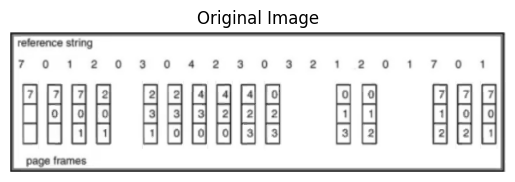

Image shape (Height, Width, Channels): (164, 579, 3)


In [5]:
# Load the image (change path to your image)
image_path = r"D:\IBM CYBER\stegno stepbystep.png"
x = cv2.imread(image_path)

# Convert to RGB for matplotlib visualization
x_rgb = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

# Show the original image
plt.imshow(x_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Display image shape
print("Image shape (Height, Width, Channels):", x.shape)

In [7]:
key = "123"  # Example key
text = "secret"  # Message to hide

print("Key:", key)
print("Text:", text)

Key: 123
Text: secret


In [8]:
# Show ASCII values of text and key
text_ascii = [d[ch] for ch in text]
key_ascii = [d[ch] for ch in key]

print("Text ASCII:", text_ascii)
print("Key ASCII:", key_ascii)

Text ASCII: [115, 101, 99, 114, 101, 116]
Key ASCII: [49, 50, 51]


In [17]:
# Make a copy of image to modify
x_enc = x.copy()

n, m, z = 0, 0, 0
kl=0
l= len(text)

# Encrypt and modify pixel values
for i in range(l):
    orig_val = x_edit[n,m,z]
    new_val = d[text[i]] ^ d[key[kl]]
    x_enc[n, m, z] = new_val
    print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel ({n},{m},{z}) [original={orig_val}]")
    n += 1
    m += 1
    z = (z + 1) % 3
    m = (m + 1) % 3
    kl = (kl + 1) % len(key)

Embedding 's' (ASCII 115) XOR '1' (ASCII 49) = 66 at pixel (0,0,0) [original=251]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (1,2,1) [original=140]
Embedding 'c' (ASCII 99) XOR '3' (ASCII 51) = 80 at pixel (2,1,2) [original=45]
Embedding 'r' (ASCII 114) XOR '1' (ASCII 49) = 67 at pixel (3,0,0) [original=87]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (4,2,1) [original=102]
Embedding 't' (ASCII 116) XOR '3' (ASCII 51) = 71 at pixel (5,1,2) [original=47]


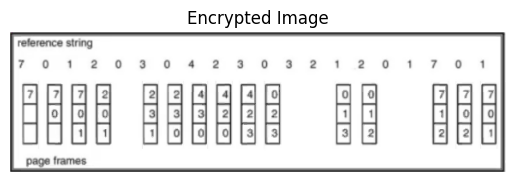

In [18]:
# Save encrypted image
cv2.imwrite("encrypted_img.jpg", x_enc)

# Show encrypted image
plt.imshow(cv2.cvtColor(x_enc, cv2.COLOR_BGR2RGB))
plt.title("Encrypted Image")
plt.axis('off')
plt.show()

In [21]:
# Decrypt
n, m, z = 0, 0, 0
kl = 0
decrypt = ""

for i in range(l):
    val = x_enc[n, m, z]
    orig_char = c[val ^ d[key[kl]]]
    decrypt += orig_char
    print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")
    n += 1
    m += 1
    m = (m + 1) % 3
    z = (z + 1) % 3
    kl = (kl + 1) % len(key)

print("Decrypted text:", decrypt)

Decrypting pixel (0,0,0): 66 XOR 49 = 115 -> 's'
Decrypting pixel (1,2,1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (2,1,2): 80 XOR 51 = 99 -> 'c'
Decrypting pixel (3,0,0): 67 XOR 49 = 114 -> 'r'
Decrypting pixel (4,2,1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (5,1,2): 71 XOR 51 = 116 -> 't'
Decrypted text: secret
